# Chapter 5: Grover's Amplification
### Qiskit 2.X

Grover's amplification  algorithm implements  exhaustive search in $O( \sqrt{n})$ steps in  n-dimensional Hilbert space. It is as good as any possible quantum algorithm for exhaustive search  due to the  lower bound $\Omega( \sqrt{n})$. 

## NumPy Example with Matrix Notation

We will demonstrate the principles of Grover's amplification using the matrix notation before explaining how to represent the algorithm with quantum gates.
To this we will use python together with $NuPy$ library that is a part of the $qiskit$ installation.  We will demonstrate the example of $m=3$, means $8=2^3$ different states. First we will built $H_3$ matrix by  (tensor) Kronecker product operation $kron$  of $H$ matrix.

In [30]:
import numpy as np
np.set_printoptions(precision=4)

In [31]:
H=np.matrix([[1, 1], [1, -1]])
H=H*1/np.sqrt(2)
np.matrix.view(H)
print("H=\n",H)

H=
 [[ 0.7071  0.7071]
 [ 0.7071 -0.7071]]


Results in the Hadarmard matrix.

In [32]:
H2=np.kron(H,H)
print("H2=\n",H2)

H2=
 [[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


In [33]:
H3=np.kron(H,H2)
print("H3=\n",H3)

H3=
 [[ 0.3536  0.3536  0.3536  0.3536  0.3536  0.3536  0.3536  0.3536]
 [ 0.3536 -0.3536  0.3536 -0.3536  0.3536 -0.3536  0.3536 -0.3536]
 [ 0.3536  0.3536 -0.3536 -0.3536  0.3536  0.3536 -0.3536 -0.3536]
 [ 0.3536 -0.3536 -0.3536  0.3536  0.3536 -0.3536 -0.3536  0.3536]
 [ 0.3536  0.3536  0.3536  0.3536 -0.3536 -0.3536 -0.3536 -0.3536]
 [ 0.3536 -0.3536  0.3536 -0.3536 -0.3536  0.3536 -0.3536  0.3536]
 [ 0.3536  0.3536 -0.3536 -0.3536 -0.3536 -0.3536  0.3536  0.3536]
 [ 0.3536 -0.3536 -0.3536  0.3536 -0.3536  0.3536  0.3536 -0.3536]]


Using the  Kronecker product operation define $H_3$. Then we define $\Lambda_m$,

In [34]:
I3=np.eye(8)
I3

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [35]:
L3=np.matrix([[-1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])
L3       

matrix([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

and 
\begin{equation}
G_3= - (H_3  \cdot \Lambda_3 \cdot H_3)
\end{equation}

In [36]:
G=-H3*L3*H3
print("G3=\n",G)

G3=
 [[-0.75  0.25  0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.25 -0.75  0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.25  0.25 -0.75  0.25  0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25 -0.75  0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25 -0.75  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25  0.25 -0.75  0.25  0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25 -0.75  0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.75]]


In the next step we represent the state vector with equally distributed amplitudes and mark the solution with a minus sign

In [37]:
a=1/np.sqrt(8)
x1=np.array([a,a,a,a,-a,a,a,a])
print("x1=\n",x1)

x1=
 [ 0.3536  0.3536  0.3536  0.3536 -0.3536  0.3536  0.3536  0.3536]


and perform a step in Grover's amplification as with the resulting amplitudes

In [38]:
x1=G.dot(x1)
print("x1=\n",x1)

x1=
 [[0.1768 0.1768 0.1768 0.1768 0.8839 0.1768 0.1768 0.1768]]


and perform the second iteration with the resulting amplitudes

In [39]:
x2=np.array([0.1768, 0.1768, 0.1768, 0.1768, -0.8839, 0.1768, 0.1768, 0.1768])
x2=G.dot(x2)
print("x2=\n",x2)

x2=
 [[-0.0884 -0.0884 -0.0884 -0.0884  0.9723 -0.0884 -0.0884 -0.0884]]


With two rotations we achieved the maximal amplitude value that corresponds to the probability value $0.945367=|0.9723|^2$. After the third rotation the amplitudes diminish again.

In [40]:
x3=np.array([-0.0884, -0.0884, -0.0884, -0.0884,-0.9723, -0.0884, -0.0884, -0.0884])
x3=G.dot(x3)
print("x3=\n",x3)

x3=
 [[-0.3094 -0.3094 -0.3094 -0.3094  0.5745 -0.3094 -0.3094 -0.3094]]


## Decompsition

With the Grove's amplification
$G_m=  - (H_m  \cdot \Lambda_m \cdot H_m) $
How can we decompose $\Lambda_m$ by quantum gates?
For three qubits we can define $\Lambda_3$ accordingly with
\begin{equation}
X_3=X \otimes X \otimes X 
\end{equation}

\begin{equation}
H_0=I \otimes I \otimes  H
\end{equation}

\begin{equation}
\Lambda_3=X_3 \cdot  H_0 \cdot CCX \cdot   H_0 \cdot  X_3 
\end{equation}

and we can represent it by the following circuit

In [41]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer

qc = QuantumCircuit(3)

#Lambda
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.barrier()
qc.x([0,1,2])

with $\Lambda_3=X_3 \cdot  H_0 \cdot CCX \cdot   H_0 \cdot  X_3$ 

In [42]:
from qiskit.visualization import array_to_latex

simulator = Aer.get_backend('qasm_simulator')
qc.save_unitary()
result = simulator.run(qc).result()
unitary = result.get_unitary(qc)
print("\nSize of the unitary matrix:",np.asarray(unitary).shape)
array_to_latex(unitary, prefix="\\text{Lambda = }\n")


Size of the unitary matrix: (8, 8)


<IPython.core.display.Latex object>

In [43]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
import numpy as np
from math import pi

and $G_3=  - (H_3  \cdot \Lambda_3 \cdot H_3) $

In [44]:
qc = QuantumCircuit(3)

#Difusor
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.barrier()
qc.x([0,1,2])
qc.h([0,1,2])

#Corrrect the sign, not required...
qc.rz(2*pi,0)
qc.rz(2*pi,1)
qc.rz(2*pi,2)


resulting in the matrix $G_3$

In [45]:
from qiskit.visualization import array_to_latex

simulator = Aer.get_backend('qasm_simulator')
qc.save_unitary()
result = simulator.run(qc).result()
unitary = result.get_unitary(qc)
print("\nSize of the unitary matrix:",np.asarray(unitary).shape)
array_to_latex(unitary, prefix="\\text{G3 = }\n")


Size of the unitary matrix: (8, 8)


<IPython.core.display.Latex object>

# Qiskit Examples

n the next step we apply Grover's amplification to a marked state of three qubits. 
Our solution corresponds to the Boolean formula 
$\neg x  \wedge y  \wedge \neg z $
for which it evaluates true, which is the case for $x=0$, $y=1$ and $z=0$. In this case  the state  determined by the oracle function is  $o(010)=1$ with the solution  encoded by  $ (-1)^{o(x)}$. 
The unitary operator $T$ 
\begin{equation}
T=  (X\otimes  I \otimes X \otimes I) \cdot  MCX  \cdot  (X \otimes I \otimes X \otimes I)
\end{equation}
represents the oracle function $o(x)$ that determines if the configuration is the goal configuration and
\begin{equation}
H_0 \cdot   T\cdot H_{4} \cdot |0001\rangle =   
   \frac{1}{\sqrt{8}} \sum\limits_{x \in B^3}  (-1)^{o(x)} \cdot |x \rangle
\otimes    |0  \rangle
\end{equation}


In [46]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate
from math import pi

qc = QuantumCircuit(4)
qc.h([0,1,2])
qc.x(3)
qc.h(3)
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
qc.x(0)
qc.x(2)
qc.barrier()
qc.h(3)
qc.draw()

┌───┐      ░ ┌───┐     ┌───┐ ░      
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░──────
     ├───┤      ░ └───┘  │  └───┘ ░      
q_1: ┤ H ├──────░────────■────────░──────
     ├───┤      ░ ┌───┐  │  ┌───┐ ░      
q_2: ┤ H ├──────░─┤ X ├──■──┤ X ├─░──────
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐
q_3: ┤ X ├┤ H ├─░──────┤ X ├──────░─┤ H ├
     └───┘└───┘ ░      └───┘      ░ └───┘

and we indicate the state vector

In [47]:
simulator = Aer.get_backend('statevector_simulator')
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state,max_size=16,prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

indicating marking the state  $|010\rangle$ by a minus sign and perform the Grover's amplification 

In [48]:
qc = QuantumCircuit(4)
qc.h([0,1,2])
#Preparation of Aux
qc.x(3)
qc.h(3)
#Oracle
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
qc.x(0)
qc.x(2)
#Diffusor
qc.barrier()
qc.h(3)
qc.barrier()
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.barrier()
qc.x([0,1,2])
qc.h([0,1,2])
#Corrrect the sign, not required...
qc.rz(2*pi,0)
qc.rz(2*pi,1)
qc.rz(2*pi,2)


qc.draw(fold=120)

┌───┐      ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐┌────────┐
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├┤ Rz(2π) ├
     ├───┤      ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ ├───┤├───┤├────────┤
q_1: ┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├┤ Rz(2π) ├
     ├───┤      ░ ┌───┐  │  ┌───┐ ░       ░ ├───┤├───┤       │        ░ ├───┤├───┤├────────┤
q_2: ┤ H ├──────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├┤ Rz(2π) ├
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘                ░ └───┘└───┘└────────┘
q_3: ┤ X ├┤ H ├─░──────┤ X ├──────░─┤ H ├─░───────────────────────────░─────────────────────
     └───┘└───┘ ░      └───┘      ░ └───┘ ░                           ░

In [49]:
simulator = Aer.get_backend('statevector_simulator')
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state,max_size=16,precision=4,prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In the next step we will perform two rotations  

In [50]:
qc = QuantumCircuit(4)
qc.h([0,1,2])
#Preparation of Aux
qc.x(3)
qc.h(3)
#Oracle
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
qc.x(0)
qc.x(2)
#Diffusor
qc.barrier()
qc.h(3)
qc.barrier()
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.barrier()
qc.x([0,1,2])
qc.h([0,1,2])
#Corrrect the sign, not required...
qc.rz(2*pi,0)
qc.rz(2*pi,1)
qc.rz(2*pi,2)

qc.h(3)
#Oracle
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
qc.x(0)
qc.x(2)
#Diffusor
qc.barrier()
qc.h(3)
qc.barrier()
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.barrier()
qc.x([0,1,2])
qc.h([0,1,2])
#Corrrect the sign, not required...
qc.rz(2*pi,0)
qc.rz(2*pi,1)
qc.rz(2*pi,2)

qc.draw()

┌───┐      ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐»
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├»
     ├───┤      ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ ├───┤»
q_1: ┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├»
     ├───┤      ░ ┌───┐  │  ┌───┐ ░       ░ ├───┤├───┤       │        ░ ├───┤»
q_2: ┤ H ├──────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■────────░─┤ X ├»
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘                ░ ├───┤»
q_3: ┤ X ├┤ H ├─░──────┤ X ├──────░─┤ H ├─░───────────────────────────░─┤ H ├»
     └───┘└───┘ ░      └───┘      ░ └───┘ ░                           ░ └───┘»
«     ┌───┐┌────────┐ ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐ ░ »
«q_0: ┤ H ├┤ Rz(2π) ├─░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─»
«     ├───┤├────────┤ ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘└───┘ ░ »
«q_1: ┤ H ├┤ Rz(2π) ├─░────────■────────░───────░─┤ H ├┤ X ├───────■────────░─»
«     ├───┤├────────┤ ░ ┌───┐  │  ┌───┐ ░       ░ ├───┤├───┤       │        ░ »
«q_2: ┤ H ├┤ Rz(2π) ├─░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■────────░─»
«     └───┘└────────┘ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘                ░ »
«q_3: ────────────────░──────┤ X ├──────░─┤ H ├─░───────────────────────────░─»
«                     ░      └───┘      ░ └───┘ ░                           ░ »
«     ┌───┐┌───┐┌────────┐
«q_0: ┤ X ├┤ H ├┤ Rz(2π) ├
«     ├───┤├───┤├────────┤
«q_1: ┤ X ├┤ H ├┤ Rz(2π) ├
«     ├───┤├───┤├────────┤
«q_2: ┤ X ├┤ H ├┤ Rz(2π) ├
«     └───┘└───┘└────────┘
«q_3: ────────────────────
«

In [51]:
simulator = Aer.get_backend('statevector_simulator')
final_state = simulator.run(qc).result().get_statevector()

from qiskit.visualization import array_to_latex
array_to_latex(final_state,max_size=16,precision=4,prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In the next step we will perform two rotations using $qasm$ $simulator$. We do not minus sign operation to get the correct result, what changes is the minus sign of the amplitudes however this as no consequence for the resulting probabilities, so the Grover's amplification will be $ G_3=  H_3  \cdot \Lambda_3 \cdot H_3 $

In [52]:
qc = QuantumCircuit(4,3)
qc.h([0,1,2])
#Preparation of Aux
qc.x(3)
qc.h(3)
#Oracle
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
qc.x(0)
qc.x(2)
#Diffusor
qc.barrier()
qc.h(3)
qc.barrier()
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.x([0,1,2])
qc.h([0,1,2])
qc.barrier()
qc.h(3)
#Oracle
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
qc.x(0)
qc.x(2)
qc.barrier()
qc.h(3)

#Diffusor

qc.barrier()
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.x([0,1,2])
qc.h([0,1,2])

qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.draw(fold=90)

┌───┐      ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░      »
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──────»
     ├───┤      ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘ ░      »
q_1: ┤ H ├──────░────────■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──────»
     ├───┤      ░ ┌───┐  │  ┌───┐ ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░      »
q_2: ┤ H ├──────░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──────»
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘      ░ ┌───┐»
q_3: ┤ X ├┤ H ├─░──────┤ X ├──────░─┤ H ├─░─────────────────────────────────────░─┤ H ├»
     └───┘└───┘ ░      └───┘      ░ └───┘ ░                                     ░ └───┘»
c: 3/══════════════════════════════════════════════════════════════════════════════════»
                                                                                       »
«      ░ ┌───┐     ┌───┐ ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌─┐      
«q_0: ─░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤M├──────
«      ░ └───┘  │  └───┘ ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘ ░ └╥┘┌─┐   
«q_1: ─░────────■────────░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├───
«      ░ ┌───┐  │  ┌───┐ ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░  ║ └╥┘┌─┐
«q_2: ─░─┤ X ├──■──┤ X ├─░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫──╫─┤M├
«      ░ └───┘┌─┴─┐└───┘ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘      ░  ║  ║ └╥┘
«q_3: ─░──────┤ X ├──────░─┤ H ├─░─────────────────────────────────────░──╫──╫──╫─
«      ░      └───┘      ░ └───┘ ░                                     ░  ║  ║  ║ 
«c: 3/════════════════════════════════════════════════════════════════════╩══╩══╩═
«                                                                         0  1  2


Total count are: {'110': 7, '001': 7, '100': 4, '011': 6, '111': 6, '101': 11, '000': 7, '010': 952}


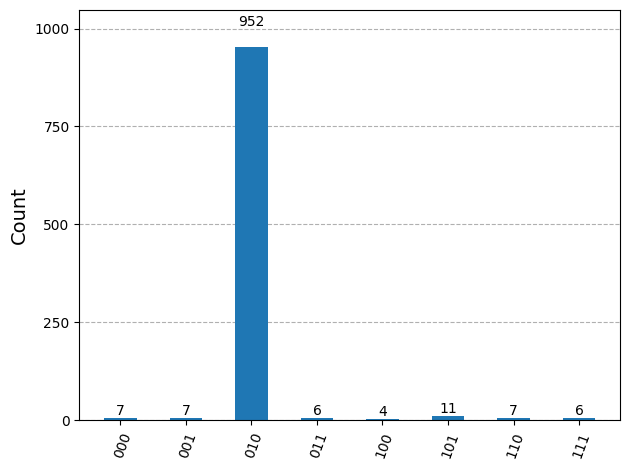

In [53]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

# Un-Computation

In quantum computation, it is not possible to reset the information to the pattern representing the initial state. Instead, we un-compute the output back to the input. In our oracle 
\begin{equation}
T=  (X\otimes  I \otimes X \otimes I) \cdot  MCX  \cdot  (X \otimes I \otimes X \otimes I)
\end{equation} 
the un-computation is represented by the operations $(X\otimes  I \otimes X \otimes I) $. We may ask what would happen if we do not un-compute and define our oracle simply as
\begin{equation}
T=  MCX  \cdot  (X \otimes I \otimes X \otimes I).
\end{equation} 


In [54]:
qc = QuantumCircuit(4)
qc.h([0,1,2])
qc.x(3)
qc.h(3)
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
#No un-computation
#qc.x(0)
#qc.x(2)
qc.barrier()
qc.h(3)
qc.draw()

┌───┐      ░ ┌───┐      ░      
q_0: ┤ H ├──────░─┤ X ├──■───░──────
     ├───┤      ░ └───┘  │   ░      
q_1: ┤ H ├──────░────────■───░──────
     ├───┤      ░ ┌───┐  │   ░      
q_2: ┤ H ├──────░─┤ X ├──■───░──────
     ├───┤┌───┐ ░ └───┘┌─┴─┐ ░ ┌───┐
q_3: ┤ X ├┤ H ├─░──────┤ X ├─░─┤ H ├
     └───┘└───┘ ░      └───┘ ░ └───┘

In this case the other remaining qubits become entangled and we cannot apply Grover's amplification correctly to the three qubits $0$, $1$ and $2$.

In [55]:
qc = QuantumCircuit(4,3)
qc.h([0,1,2])
#Preparation of Aux
qc.x(3)
qc.h(3)
#Oracle
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
#qc.x(0)
#qc.x(2)
#Diffusor
qc.barrier()
qc.h(3)
qc.barrier()
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.x([0,1,2])
qc.h([0,1,2])
qc.barrier()
qc.h(3)
#Oracle
qc.barrier()
qc.x(0)
qc.x(2)
gate = MCXGate(3)
qc.append(gate, [0, 1, 2, 3])
#qc.x(0)
#qc.x(2)
qc.barrier()
qc.h(3)
#Diffusor
qc.barrier()
qc.h([0,1,2])
qc.x([0,1,2])
qc.h(0)
qc.ccx(1,2,0)
qc.h(0)
qc.x([0,1,2])
qc.h([0,1,2])

qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

qc.draw(fold=90)

┌───┐      ░ ┌───┐      ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░       ░ »
q_0: ┤ H ├──────░─┤ X ├──■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░───────░─»
     ├───┤      ░ └───┘  │   ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘ ░       ░ »
q_1: ┤ H ├──────░────────■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░─»
     ├───┤      ░ ┌───┐  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░       ░ »
q_2: ┤ H ├──────░─┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░───────░─»
     ├───┤┌───┐ ░ └───┘┌─┴─┐ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘      ░ ┌───┐ ░ »
q_3: ┤ X ├┤ H ├─░──────┤ X ├─░─┤ H ├─░─────────────────────────────────────░─┤ H ├─░─»
     └───┘└───┘ ░      └───┘ ░ └───┘ ░                                     ░ └───┘ ░ »
c: 3/════════════════════════════════════════════════════════════════════════════════»
                                                                                     »
«     ┌───┐      ░       ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░ ┌─┐      
«q_0: ┤ X ├──■───░───────░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤M├──────
«     └───┘  │   ░       ░ ├───┤├───┤└───┘└─┬─┘├───┤├───┤└───┘ ░ └╥┘┌─┐   
«q_1: ───────■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫─┤M├───
«     ┌───┐  │   ░       ░ ├───┤├───┤       │  ├───┤├───┤      ░  ║ └╥┘┌─┐
«q_2: ┤ X ├──■───░───────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──╫──╫─┤M├
«     └───┘┌─┴─┐ ░ ┌───┐ ░ └───┘└───┘          └───┘└───┘      ░  ║  ║ └╥┘
«q_3: ─────┤ X ├─░─┤ H ├─░─────────────────────────────────────░──╫──╫──╫─
«          └───┘ ░ └───┘ ░                                     ░  ║  ║  ║ 
«c: 3/════════════════════════════════════════════════════════════╩══╩══╩═
«                                                                 0  1  2

The resulting histogram of cost does not indicate the correct solution


Total count are: {'101': 51, '100': 83, '001': 66, '110': 81, '010': 198, '000': 63, '011': 75, '111': 383}


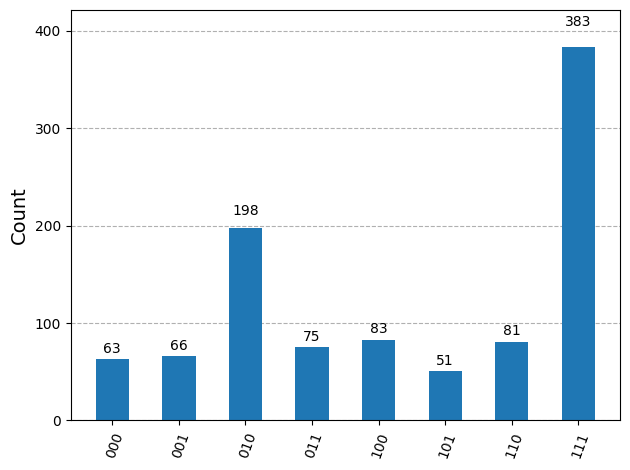

In [56]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

We have to un-compute the information to the pattern representing the initial state before applying the Grover's algorithm.